In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/robot_inverse_kinematics_dataset.csv', engine='python')

In [3]:
df.head()

,q1,q2,q3,q4,q5,q6,x,y,z
0,-1.51,-0.763,1.85,-0.817,0.9120,2.320,-0.0947,0.1500,0.301
1,-2.84,0.520,1.58,-1.270,-1.3900,0.617,0.1420,-0.1000,0.225
2,-1.23,0.695,1.22,-1.130,0.0343,6.270,-0.0833,0.2230,0.206
3,-1.99,1.060,1.74,-1.760,-1.2400,4.760,0.1350,-0.0314,0.370
4,1.05,0.836,1.34,-1.890,0.4840,4.380,-0.0560,-0.2290,0.260


In [6]:
arr = df.iloc[0]

In [7]:
arr

q1   -1.5100
q2   -0.7630
q3    1.8500
q4   -0.8170
q5    0.9120
q6    2.3200
x    -0.0947
y     0.1500
z     0.3010
Name: 0, dtype: float64

In [8]:
arr[0]

-1.51

In [11]:
df['q1']

0       -1.510
1       -2.840
2       -1.230
3       -1.990
4        1.050
         ...  
14995    0.314
14996    2.450
14997    2.620
14998   -1.890
14999    2.680
Name: q1, Length: 15000, dtype: float64

**TASK 1: How are the joint values (q1, q2, q3, q4, q5, q6) generated for a robot? Can you explain how these values are determined?**


The joint parameters of a robot arm or end effector are the scalar values, usually measured in linear displacement units and angular units, all of which together define the set of all possible positions the device can attain.
The process of determining these joint values is known as inverse kinematics.

Inverse kinematics involves solving a mathematical model that relates the joint variables to the end-effector position and orientation. The robot's kinematic equations, which define the relationships between joint angles and the position/orientation of the end-effector, are used to establish this mathematical model. These equations can be derived based on the robot's physical structure and joint types (e.g., revolute or prismatic).

The solution of inverse kinematics is typically achieved through numerical methods or closed-form analytical solutions, depending on the complexity of the robot's kinematics.


In [33]:
# Generate random joint values for q1 to q6
q1 = np.random.uniform(-2.88, 2.88 )
q2 = np.random.uniform(-1.92, 1.92 )
q3 = np.random.uniform( 1.22, 1.92)
q4 = np.random.uniform(-2.79, 2.79)
q5 = np.random.uniform(-2.09, 2.09)
q6 = np.random.uniform(0.000441, 6.28)
print (q1, q2, q3, q4, q5, q6)

-0.624911825041329 -1.890125944374301 1.6731781689895147 -1.0484186026290112 -0.5740596845530597 3.928199958859385


**TASK 2: How are the x, y, and z coordinates calculated based on the joint values of a robot? Can you explain the relationship between the joint values and the Cartesian coordinates?**

The relationship between the joint values and the Cartesian coordinates (x, y, z) of a robot's end-effector is established through forward kinematics. Forward kinematics calculates the position and orientation of the end-effector based on the known joint angles.


The values x, y, and z are calculated based on the direct kinematics model of a IRB 120 robotic manipulator obtained through Denavit-Hartenberg.

This allows us to use robot coordinates in the joint-coordinate space (the angles of each individual robot joint) to determine the tool-coordinate space (x, y, z with the origin in the base of the robotic manipulator).

In [34]:
# Joint values
q1 = -1.51
q2 = -7.63
q3 = 1.85
q4 = -8.17
q5 = 9.12
q6 = 2.32


# DH parameters
alpha = np.array([-np.pi/2, 0, -np.pi/2, np.pi/2, -np.pi/2, 0])
a = np.array([0, 0, 0.290, 0.270, 0, 0])
d = np.array([0, 0, 0, 0, 0.302, 0.072])

# Homogeneous transformation matrix
def dh_transform(alpha, a, d, q):
    cos_q = np.cos(q)
    sin_q = np.sin(q)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)

    T = np.array([
        [cos_q, -sin_q*cos_alpha, sin_q*sin_alpha, a*cos_q],
        [sin_q, cos_q*cos_alpha, -cos_q*sin_alpha, a*sin_q],
        [0, sin_alpha, cos_alpha, d],
        [0, 0, 0, 1]
    ])

    return T

# Calculate overall transformation matrix
T = np.eye(4)
for i in range(6):
    T_i = dh_transform(alpha[i], a[i], d[i], eval(f'q{i+1}'))
    T = np.matmul(T, T_i)

# Extract position
x = T[0, 3]
y = T[1, 3]
z = T[2, 3]

# Print results
print("Position:")
print("x =", x)
print("y =", y)
print("z =", z)


Position:
x = 0.1400345905672422
y = 0.04050345464841037
z = 0.09596967296025702


**TASK 3: Which joint variables (q1..q6) have a significant impact on the x, y, and z coordinates? Can you analyze their influence?**



The joint variables (q1, q2, q3, q4, q5, q6) of a robot can have varying degrees of influence on the x, y, and z coordinates of the end-effector, depending on the robot's kinematic structure. However, in a typical serial manipulator with a 6-degree-of-freedom (DOF) configuration, the joint variables q1, q2, and q3 usually have a direct impact on the end-effector's position in Cartesian space, while q4, q5, and q6 primarily affect its orientation.


We will use the Denavit-Hartenberg (DH) parameters to calculate the forward kinematics and visualize the impact of joint variables on the Cartesian coordinates. As given us that the data is of IRB 120 robotic manipulator.

In [35]:
import numpy as np

# DH parameters
alpha = [-np.pi/2, 0, -np.pi/2, np.pi/2, -np.pi/2, 0]
a = [0, 0, 0.290, 0.270, 0, 0]
d = [0, 0, 0, 0, 0.302, 0.072]

# Joint values
q1 = -1.51
q2 = -7.63
q3 = 1.85
q4 = -8.17
q5 = 9.12
q6 = 2.32

# Set the joint angles
q = np.array([q1, q2, q3, q4, q5, q6])

# Transformation matrices
T = []

# Forward kinematics
for i in range(6):
    ct = np.cos(q[i])
    st = np.sin(q[i])
    ca = np.cos(alpha[i])
    sa = np.sin(alpha[i])
    A = np.array([
        [ct, -st*ca, st*sa, a[i]*ct],
        [st, ct*ca, -ct*sa, a[i]*st],
        [0, sa, ca, d[i]],
        [0, 0, 0, 1]
    ])
    if i == 0:
        T.append(A)
    else:
        T.append(T[i-1] @ A)

# Cartesian coordinates of the end effector
x = T[5][0, 3]
y = T[5][1, 3]
z = T[5][2, 3]

# Print the Cartesian coordinates
print("Cartesian Coordinates:")
print("x =", x)
print("y =", y)
print("z =", z)

# Sensitivity analysis
sensitivities = []

perturbation = 0.001  # Small perturbation to joint variable

for i in range(6):
    q_perturbed = np.copy(q)
    q_perturbed[i] += perturbation

    T_perturbed = []

    for j in range(6):
        ct = np.cos(q_perturbed[j])
        st = np.sin(q_perturbed[j])
        ca = np.cos(alpha[j])
        sa = np.sin(alpha[j])
        A = np.array([
            [ct, -st*ca, st*sa, a[j]*ct],
            [st, ct*ca, -ct*sa, a[j]*st],
            [0, sa, ca, d[j]],
            [0, 0, 0, 1]
        ])
        if j == 0:
            T_perturbed.append(A)
        else:
            T_perturbed.append(T_perturbed[j-1] @ A)

    dx = T_perturbed[5][0, 3] - T[5][0, 3]
    dy = T_perturbed[5][1, 3] - T[5][1, 3]
    dz = T_perturbed[5][2, 3] - T[5][2, 3]

    sensitivities.append((dx / perturbation, dy / perturbation, dz / perturbation))

# Print the sensitivities
print("Sensitivities:")
for i, sensitivity in enumerate(sensitivities):
    dx, dy, dz = sensitivity
    print(f"Joint {i+1}:")
    print("dx =", dx)
    print("dy =", dy)
    print("dz =", dz)
    print()

Cartesian Coordinates:
x = 0.1400345905672422
y = 0.04050345464841037
z = 0.09596967296025702
Sensitivities:
Joint 1:
dx = -0.040573465187293545
dy = 0.14001431550245136
dz = 0.0

Joint 2:
dx = 0.005831978708348284
dy = -0.09580828103574607
dz = 0.031872288194567666

Joint 3:
dx = 0.005831978708348284
dy = -0.09580828103568362
dz = 0.031872288194567666

Joint 4:
dx = 0.371078802319319
dy = -0.10240910270604975
dz = -0.06867703141771875

Joint 5:
dx = 0.06466599901708281
dy = 0.012251941226892882
dz = 0.029192431815261433

Joint 6:
dx = 0.0
dy = 0.0
dz = 0.0



**TASK 4: Relationship between joint variables (q1,..q6) and dependent variables x, y and z using scatter plots and scatter plot matrix**

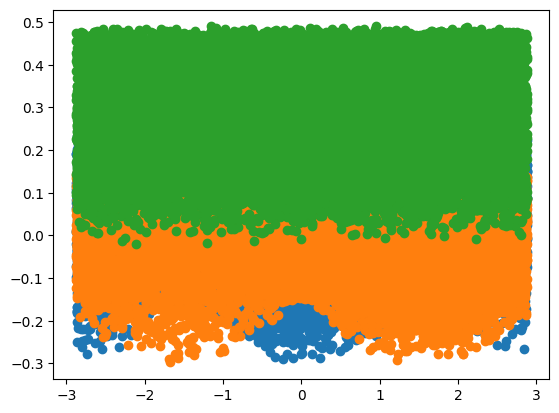

In [13]:
plt.scatter(df['q1'], df['x'])
plt.scatter(df['q1'], df['y'])
plt.scatter(df['q1'], df['z'])

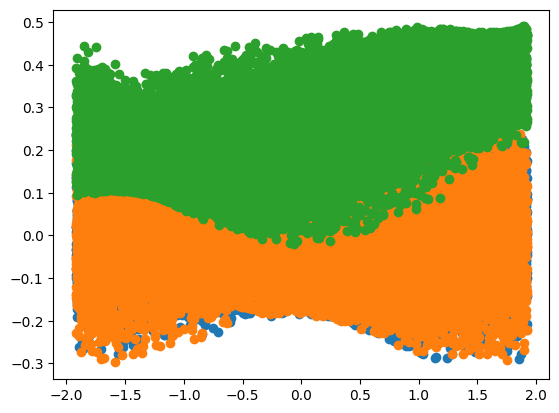

In [14]:
plt.scatter(df['q2'], df['x'])
plt.scatter(df['q2'], df['y'])
plt.scatter(df['q2'], df['z'])

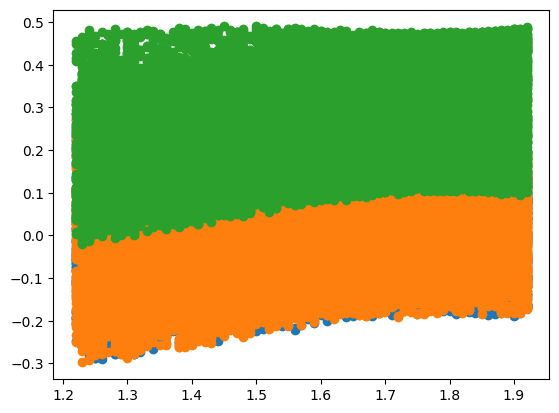

In [15]:
plt.scatter(df['q3'], df['x'])
plt.scatter(df['q3'], df['y'])
plt.scatter(df['q3'], df['z'])

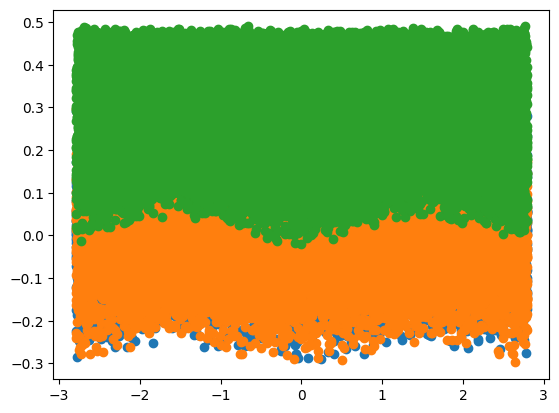

In [16]:
plt.scatter(df['q4'], df['x'])
plt.scatter(df['q4'], df['y'])
plt.scatter(df['q4'], df['z'])

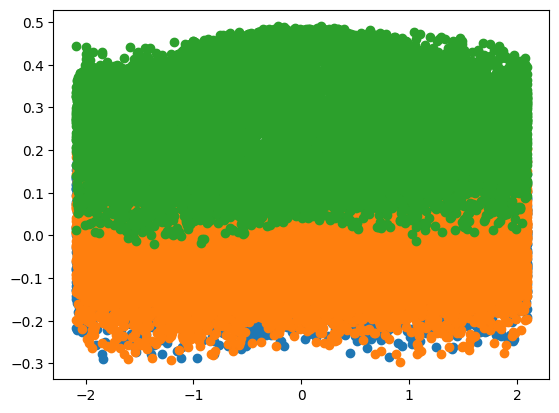

In [17]:
plt.scatter(df['q5'], df['x'])
plt.scatter(df['q5'], df['y'])
plt.scatter(df['q5'], df['z'])

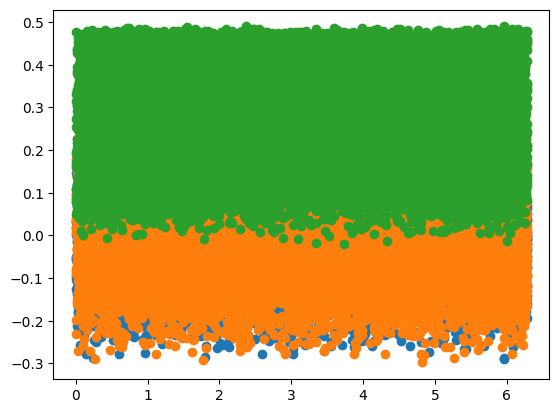

In [18]:
plt.scatter(df['q6'], df['x'])
plt.scatter(df['q6'], df['y'])
plt.scatter(df['q6'], df['z'])

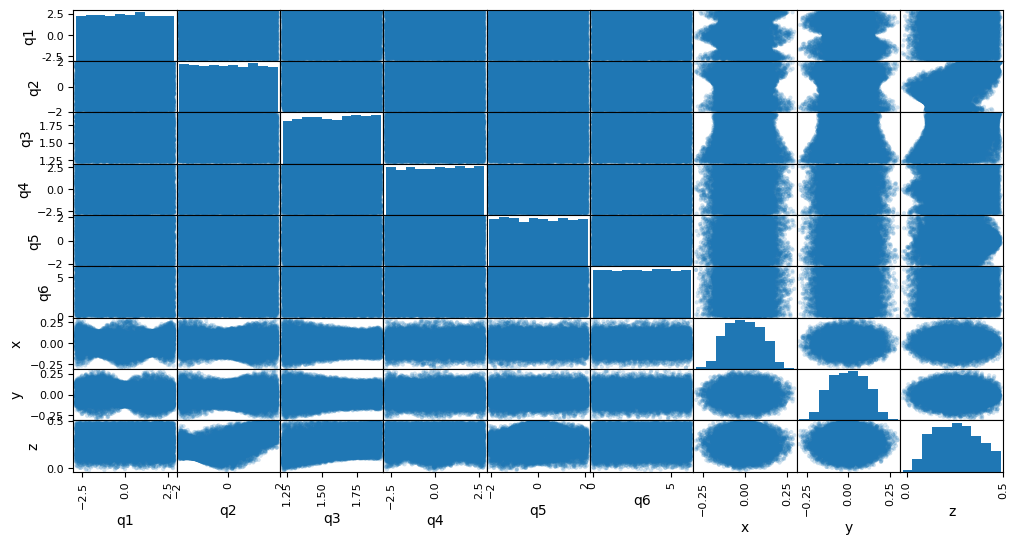

In [19]:
from pandas.plotting import scatter_matrix

# Create the scatter plot matrix
scatter_matrix(df, alpha=0.2, figsize=(12,6))

# Display the plot
plt.show()

**TASK 5: TO CHECK OUTLIERS**

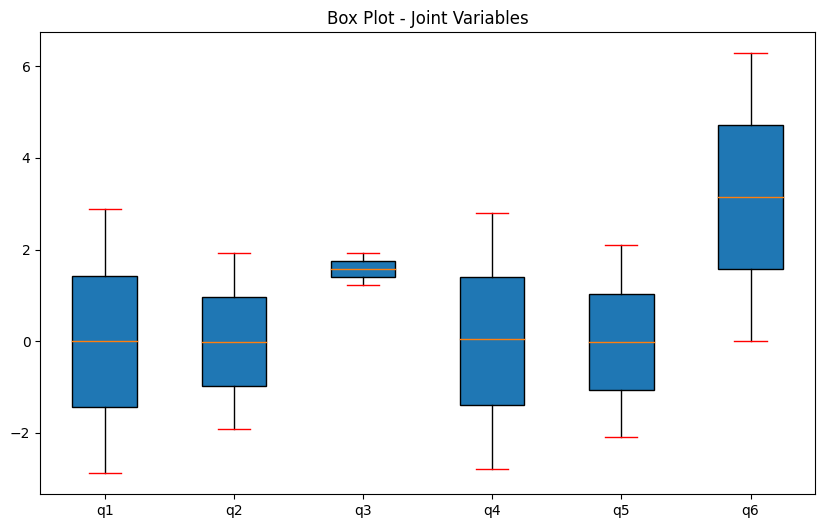

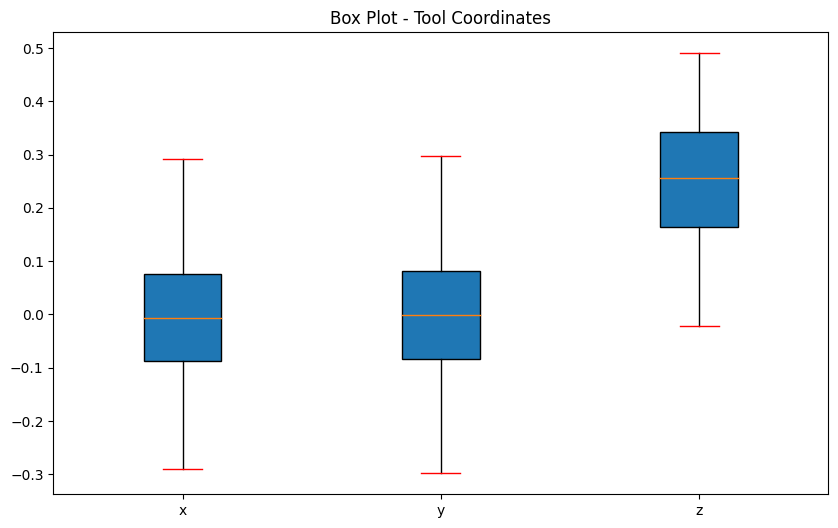

In [20]:
# Extract the joint variables and the corresponding coordinates
joint_variables = df[['q1', 'q2', 'q3', 'q4', 'q5', 'q6']]
coordinates = df[['x', 'y', 'z']]

# Create box plots for joint variables
plt.figure(figsize=(10, 6))
plt.boxplot(joint_variables.values, labels=joint_variables.columns,patch_artist=True,capprops=dict(color="r"))
plt.title('Box Plot - Joint Variables')
plt.show()

# Create box plots for coordinates
plt.figure(figsize=(10, 6))
plt.boxplot(coordinates.values, labels=coordinates.columns,patch_artist=True,capprops=dict(color="r"))
plt.title('Box Plot - Tool Coordinates')
plt.show()

**REGRESSION MODEL FOR THIS PROBLEM**

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X = df[['q1','q2','q3','q4','q5','q6']]  # Independent variables
Y = df[['x','y','z']] # Dependent variables

In [24]:
X.shape

(15000, 6)

In [25]:
Y.shape

(15000, 3)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [27]:
X_train.shape, Y_train.shape #shape of training data

((12000, 6), (12000, 3))

In [28]:
X_test.shape, Y_test.shape #shape of testing data

((3000, 6), (3000, 3))

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [30]:
from sklearn.linear_model import LinearRegression

# Assuming you have your independent variables (q1 to q6) and dependent variables (x, y, z) in numpy arrays or lists
X = df[['q1','q2','q3','q4','q5','q6']]  # Independent variables
Y = df[['x','y','z']] # Dependent variables

independent_vars = X_train
dependent_vars = Y_train

# Create and fit the linear regression model
model = LinearRegression()
model.fit(independent_vars, dependent_vars)

Y_pred=model.predict(X_test)

print("mean squared error is: ", mean_squared_error(Y_test,Y_pred))
print("mean absolute error is: ", mean_absolute_error(Y_test,Y_pred))

mean squared error is:  0.00945195289233838
mean absolute error is:  0.08061281880126352


In [31]:
model.score(X_train, Y_train) #Train score

0.1646893723643568

In [32]:
model.score(X_test, Y_test) #Test score

0.16078402063472008